### Edgar Moises Hernandez-Gonzalez
#### 12/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con CNN-1D + LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 1013))
x_test = x_test.reshape((n_samples_test, 1, 22, 1013))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 1013)
(288, 1, 22, 1013)


In [11]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1013, 22)
(288, 1, 1013, 22)


Iteration: 1
288/288 [==============================] - 0s 316us/sample - loss: 2.8675 - acc: 0.3819
kappa:  0.17592592592592593
confusion matrix:
 [[14 39 13  6]
 [16 50  5  1]
 [11 17 24 20]
 [ 5  6 39 22]]
(0.37401307141213974, 0.3819444444444444, 0.36453206257380694, None)


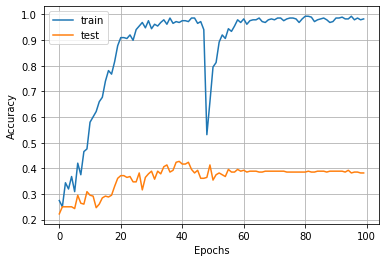

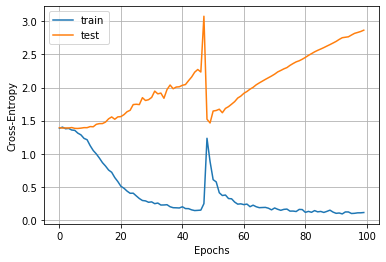

Iteration: 2
288/288 [==============================] - 0s 307us/sample - loss: 3.6492 - acc: 0.3611
kappa:  0.14814814814814814
confusion matrix:
 [[29 27  7  9]
 [30 27 10  5]
 [24 10 16 22]
 [22  4 14 32]]
(0.3710657667322248, 0.3611111111111111, 0.35986208042539053, None)


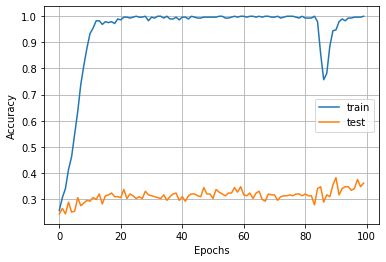

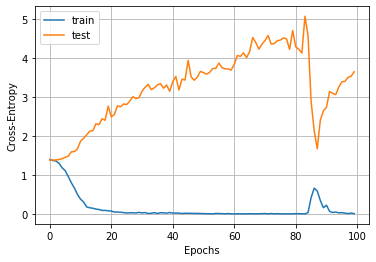

Iteration: 3
288/288 [==============================] - 0s 303us/sample - loss: 4.0719 - acc: 0.3715
kappa:  0.1620370370370371
confusion matrix:
 [[23 29 15  5]
 [22 38 11  1]
 [17 19 26 10]
 [13 11 28 20]]
(0.39474369988545244, 0.3715277777777778, 0.36877623640203167, None)


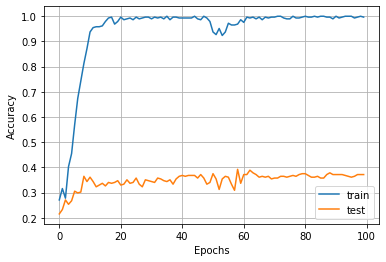

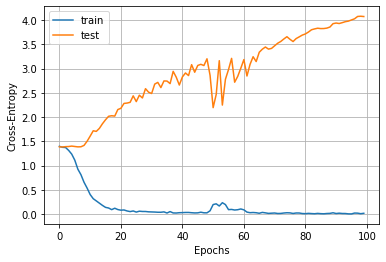

Iteration: 4
288/288 [==============================] - 0s 318us/sample - loss: 4.9749 - acc: 0.2396
kappa:  -0.01388888888888884
confusion matrix:
 [[14 21 20 17]
 [28 21 14  9]
 [16 20 18 18]
 [19 18 19 16]]
(0.24112649381135298, 0.23958333333333334, 0.2396019366833567, None)


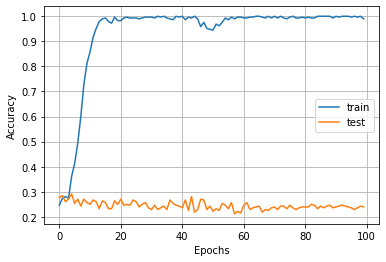

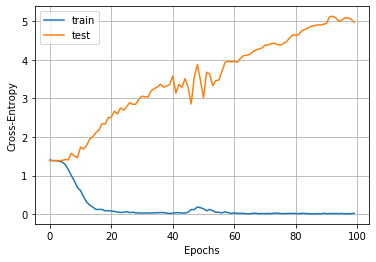

Iteration: 5
288/288 [==============================] - 0s 312us/sample - loss: 4.8264 - acc: 0.2847
kappa:  0.04629629629629628
confusion matrix:
 [[38 30  4  0]
 [39 30  3  0]
 [29 32  9  2]
 [27 34  6  5]]
(0.4117965367965368, 0.2847222222222222, 0.24795841263262913, None)


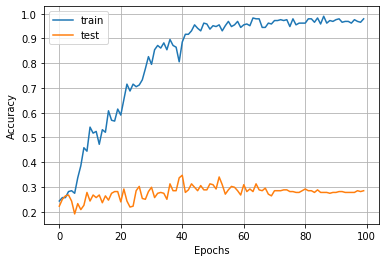

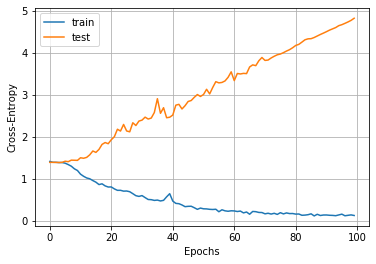

Iteration: 6
288/288 [==============================] - 0s 301us/sample - loss: 4.0216 - acc: 0.3125
kappa:  0.08333333333333337
confusion matrix:
 [[22 25 14 11]
 [25 23 16  8]
 [19 19 20 14]
 [12 11 24 25]]
(0.31955695748799195, 0.3125, 0.3146469968387776, None)


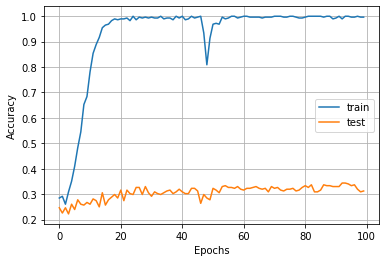

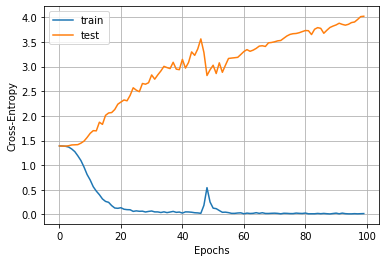

Iteration: 7
288/288 [==============================] - 0s 317us/sample - loss: 3.8916 - acc: 0.3750
kappa:  0.16666666666666663
confusion matrix:
 [[20 22 22  8]
 [28 36  7  1]
 [18  4 25 25]
 [20  3 22 27]]
(0.3894936531554406, 0.375, 0.38064121941233064, None)


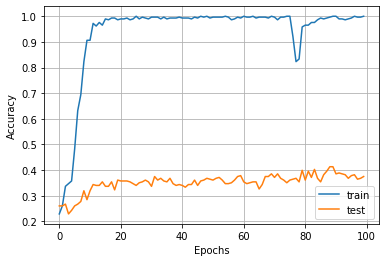

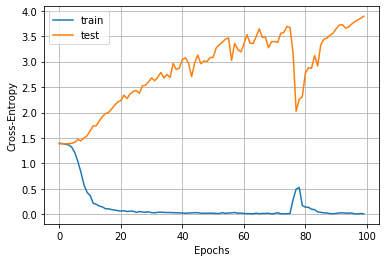

Iteration: 8
288/288 [==============================] - 0s 326us/sample - loss: 2.0604 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[22 25 12 13]
 [30 36  4  2]
 [ 7  1 31 33]
 [ 1  2 31 38]]
(0.44211575730471075, 0.4409722222222222, 0.4392727724000993, None)


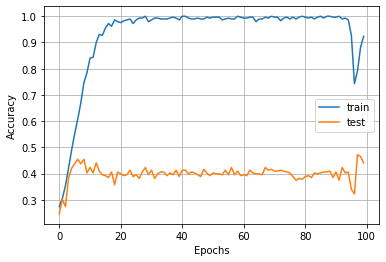

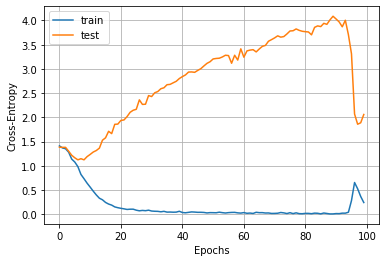

Iteration: 9
288/288 [==============================] - 0s 319us/sample - loss: 3.9221 - acc: 0.2778
kappa:  0.03703703703703709
confusion matrix:
 [[18 15 26 13]
 [22 13 19 18]
 [22  6 24 20]
 [14 13 20 25]]
(0.27801203492834403, 0.2777777777777778, 0.2744262805004493, None)


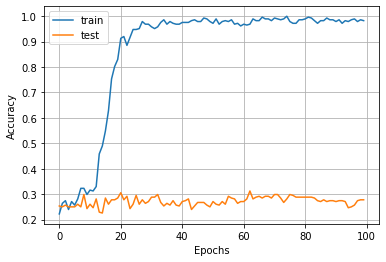

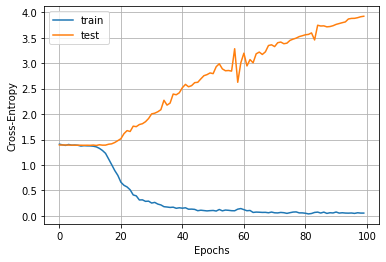

Iteration: 10
288/288 [==============================] - 0s 305us/sample - loss: 3.0335 - acc: 0.3507
kappa:  0.1342592592592593
confusion matrix:
 [[16 30 21  5]
 [24 29 15  4]
 [ 9  7 35 21]
 [ 2  7 42 21]]
(0.35812124583134264, 0.3506944444444445, 0.34500109865963524, None)


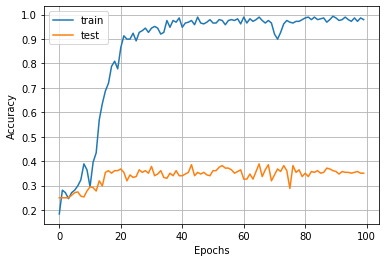

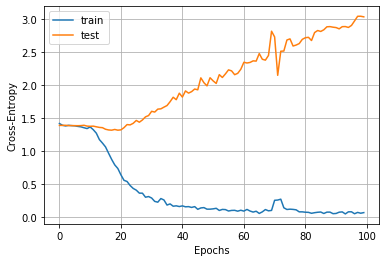


Resultados:
loss: [2.867549260457357, 3.6492261356777616, 4.071886724895901, 4.97488980823093, 4.82638414700826, 4.021595981385973, 3.891609642240736, 2.06041329436832, 3.922087642881605, 3.0334738890329995]
accuracy: [0.38194445, 0.3611111, 0.3715278, 0.23958333, 0.2847222, 0.3125, 0.375, 0.4409722, 0.2777778, 0.35069445]
kappa: [0.17592592592592593, 0.14814814814814814, 0.1620370370370371, -0.01388888888888884, 0.04629629629629628, 0.08333333333333337, 0.16666666666666663, 0.25462962962962965, 0.03703703703703709, 0.1342592592592593]
precision: [0.37401307141213974, 0.3710657667322248, 0.39474369988545244, 0.24112649381135298, 0.4117965367965368, 0.31955695748799195, 0.3894936531554406, 0.44211575730471075, 0.27801203492834403, 0.35812124583134264]
recall: [0.3819444444444444, 0.3611111111111111, 0.3715277777777778, 0.23958333333333334, 0.2847222222222222, 0.3125, 0.375, 0.4409722222222222, 0.2777777777777778, 0.3506944444444445]
f1: [0.36453206257380694, 0.35986208042539053, 0.3687

In [15]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(8, 11, activation='relu'), input_shape=(None,1013,22)))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(16))
    model.add(Dense(32, activation='relu')) #eliminar
    model.add(Dropout(0.5)) #eliminar
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [16]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_133 (TimeDi (None, None, 1003, 8)     1944      
_________________________________________________________________
time_distributed_134 (TimeDi (None, None, 501, 8)      0         
_________________________________________________________________
time_distributed_135 (TimeDi (None, None, 491, 16)     1424      
_________________________________________________________________
time_distributed_136 (TimeDi (None, None, 245, 16)     0         
_________________________________________________________________
time_distributed_137 (TimeDi (None, None, 235, 16)     2832      
_________________________________________________________________
time_distributed_138 (TimeDi (None, None, 117, 16)     0         
_________________________________________________________________
time_distributed_139 (TimeDi (None, None, 1872)      

In [17]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3396
std: (+/- 0.0570)
kappa: 0.1194
precision: 0.3580
recall: 0.3396
f1: 0.3335
